### Imports

In [7]:
import polars as pl
import pandas as pd
from scipy import stats
import numpy as np
import joblib
import os
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import shap

/Users/hq-n2y0j7g2k4/Documents/hse_projects/uplift-modelling/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Constants

In [3]:
RANDOM_STATE = 1
FILES_DIR = "../data"
os.makedirs(FILES_DIR, exist_ok=True)
MODELS_DIR = "../models"
os.makedirs(MODELS_DIR, exist_ok=True)

### Read data

In [4]:
file_name = "xy_train_test_33.joblib"
file_path = os.path.join(FILES_DIR, file_name)
xy_train_test = joblib.load(file_path)
X_test = xy_train_test["X_test"]
X_train = xy_train_test["X_train"]
y_train = xy_train_test["y_train"]
y_test = xy_train_test["y_test"]

In [5]:
cat_cols = [
    "All Negative CYP2C19",
    "BMS or DES",
    "Comorbidity Index",
    "Coronary Artery Lesion",
    "Left Main Coronary Artery Lesion",
    "P2Y12 inhibitor",
]

### Train model

In [5]:
model = CatBoostClassifier(
    random_seed=2024,
    cat_features=cat_cols,
    eval_metric="AUC",
    depth=3,
    iterations=500,
    learning_rate=0.06,
)

model.fit(
    X=X_train,
    y=y_train,
    # early_stopping_rounds=50,
    verbose=True,
    # eval_set=(
    #     X_eval,
    #     y_eval,
    # ),
)

metric = roc_auc_score(
    y_test,
    model.predict_proba(X_test)[:, 1],
)
print(metric.round(3))

0:	total: 77.9ms	remaining: 38.9s
1:	total: 79.6ms	remaining: 19.8s
2:	total: 83.9ms	remaining: 13.9s
3:	total: 85.6ms	remaining: 10.6s
4:	total: 88.7ms	remaining: 8.78s
5:	total: 91.9ms	remaining: 7.57s
6:	total: 93.7ms	remaining: 6.6s
7:	total: 95.3ms	remaining: 5.86s
8:	total: 96.3ms	remaining: 5.25s
9:	total: 97.9ms	remaining: 4.8s
10:	total: 99ms	remaining: 4.4s
11:	total: 101ms	remaining: 4.13s
12:	total: 103ms	remaining: 3.85s
13:	total: 104ms	remaining: 3.62s
14:	total: 105ms	remaining: 3.41s
15:	total: 107ms	remaining: 3.23s
16:	total: 109ms	remaining: 3.08s
17:	total: 110ms	remaining: 2.94s
18:	total: 113ms	remaining: 2.86s
19:	total: 115ms	remaining: 2.77s
20:	total: 117ms	remaining: 2.66s
21:	total: 118ms	remaining: 2.56s
22:	total: 119ms	remaining: 2.46s
23:	total: 120ms	remaining: 2.38s
24:	total: 121ms	remaining: 2.29s
25:	total: 122ms	remaining: 2.21s
26:	total: 122ms	remaining: 2.14s
27:	total: 123ms	remaining: 2.08s
28:	total: 125ms	remaining: 2.03s
29:	total: 126ms	r

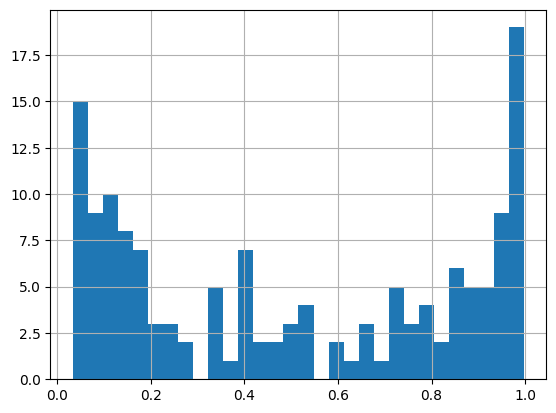

In [6]:
plt.hist(model.predict_proba(X_train)[:, 1], bins=30)
plt.grid()

In [6]:
# Saving model
file_name = "boosting_33.joblib"
file_path = os.path.join(MODELS_DIR, file_name)
model = joblib.load(file_path)

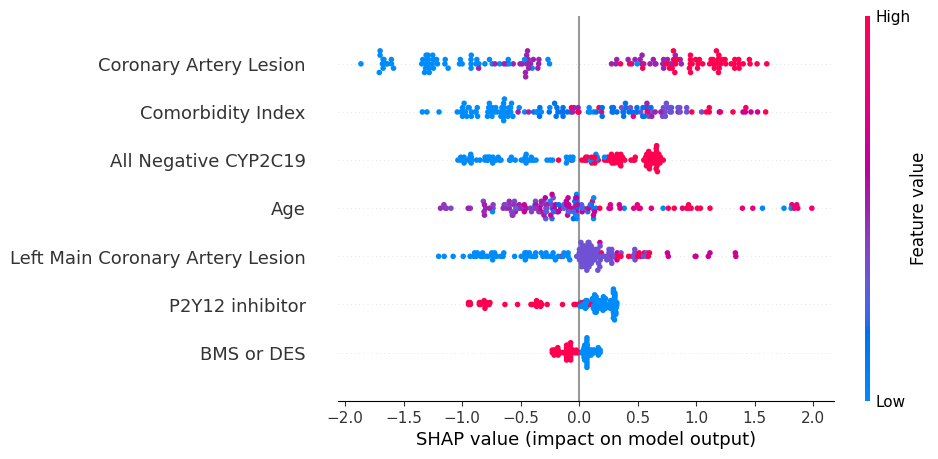

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values, plot_size=(8, 5))
plt.show()

### Save data

In [7]:
# Saving model
file_name = "boosting_33.joblib"
file_path = os.path.join(MODELS_DIR, file_name)
joblib.dump(model, file_path)

['../models/boosting_33.joblib']